In [37]:
#import stuff we will need
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

#import functions from my .py files
import acquire
import prepare 
import explore 
import evaluate 
import model as m
#Might needed or might be not 
import wrangle

In [2]:
#acquire our Zillow data from CodeUp server, and turn into .csv
df = acquire.get_zillow_data()

In [3]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,14297519,4.0,3.5,3100.0,1023282.0,1998.0,6059.0
1,17052889,2.0,1.0,1465.0,464000.0,1967.0,6111.0
2,14186244,3.0,2.0,1243.0,564778.0,1962.0,6059.0
3,12177905,4.0,3.0,2376.0,145143.0,1970.0,6037.0
4,12095076,4.0,3.0,2962.0,773303.0,1950.0,6037.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   bedroomcnt                    52441 non-null  float64
 2   bathroomcnt                   52441 non-null  float64
 3   calculatedfinishedsquarefeet  52359 non-null  float64
 4   taxvaluedollarcnt             52440 non-null  float64
 5   yearbuilt                     52325 non-null  float64
 6   fips                          52441 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.2 MB


In [5]:
#Using wrangle to get null-values check function
wrangle.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 3 columns that have missing values.
  
** There are 121 duplicate rows that represents 0.23% of total Values**


,Missing Values,% of Total Values
yearbuilt,116,0.2
calculatedfinishedsquarefeet,82,0.2
taxvaluedollarcnt,1,0.0


In [6]:
#Using clean function from prepare
df = prepare.clean_zillow(df)

In [7]:
#Check again after cleanning
wrangle.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52200 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcel_id        52200 non-null  object 
 1   number_bedroom   52200 non-null  float64
 2   number_bathroom  52200 non-null  float64
 3   sqft             52200 non-null  float64
 4   tax_value        52200 non-null  float64
 5   yearbuilt        52200 non-null  float64
 6   geographic_code  52200 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
prepare.unique_cntvalues(df, 30)

************************** COUNT OF UNIQUE VALUES ************************** 
Columns
 
parcel_id --> 52200 unique values
 
number_bedroom --> 14 unique values
 
number_bathroom --> 22 unique values
 
sqft --> 4720 unique values
 
tax_value --> 38847 unique values
 
yearbuilt --> 133 unique values
 
geographic_code --> 3 unique values
 
 **************************  UNIQUE VALUES **************************
 
Uniques values of all the columns that have less than 30 unique values 
 
number_bedroom
0.0        57
1.0       604
2.0      8310
3.0     23292
4.0     15198
5.0      3964
6.0       632
7.0       106
8.0        24
9.0         8
10.0        2
11.0        1
12.0        1
14.0        1
Name: number_bedroom, dtype: int64
--------------------------- 
 
number_bathroom
0.0        41
1.0      9521
1.5       838
2.0     21835
2.5      3929
3.0     10643
3.5       911
4.0      2225
4.5       681
5.0       803
5.5       224
6.0       320
6.5        47
7.0        88
7.5        16
8.0        5

In [10]:
#Total of 25 properties with zero bedroom and bathroom
#We will keep these for now and check later if want to drop it
df[(df.number_bedroom == 0) & (df.number_bathroom == 0)]

,parcel_id,number_bedroom,number_bathroom,sqft,tax_value,yearbuilt,geographic_code
2694,12227894,0.0,0.0,1208.0,185161.0,1990.0,6037
2899,12146026,0.0,0.0,280.0,963472.0,1953.0,6037
6132,12664381,0.0,0.0,128.0,49859.0,1949.0,6037
10294,14121842,0.0,0.0,1454.0,151824.0,1912.0,6059
15658,11953654,0.0,0.0,812.0,22102.0,1924.0,6037
16561,13841412,0.0,0.0,1567.0,226597.0,1914.0,6059
17766,11712886,0.0,0.0,3087.0,631299.0,1947.0,6037
20987,12038635,0.0,0.0,554.0,440000.0,1927.0,6037
21456,11266326,0.0,0.0,400.0,49627.0,1950.0,6037
22910,14507431,0.0,0.0,4184.0,1145602.0,1964.0,6059


In [11]:
#let's split our data using my train_validate_test function, and check our train, validate, and test shapes. Our target is tax_value.
target = 'tax_value'
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.train_validate_test(df, target)
train.shape, validate.shape, test.shape

X_train -> (29232, 6)               y_train->(29232,)
X_validate -> (12528, 6)         y_validate->(12528,) 
X_test -> (10440, 6)                  y_test>(10440,)


((29232, 7), (12528, 7), (10440, 7))

In [12]:
#let's scale our data using the min_max_scale function. Not scaling the target. 
X_train_scaled, X_validate_scaled, X_test_scaled = prepare.scaled_df(X_train, X_validate, X_test, MinMaxScaler())

#### Explore

Before Exploration this is what I think:

The variables that can influence the value of home are square feet, and number of bedrooms and at last number of bathrooms.
square feet, and number of bedrooms can have an influence no matter where the property located.

other factors can influence the value of a home such as zip code, year built, school district.

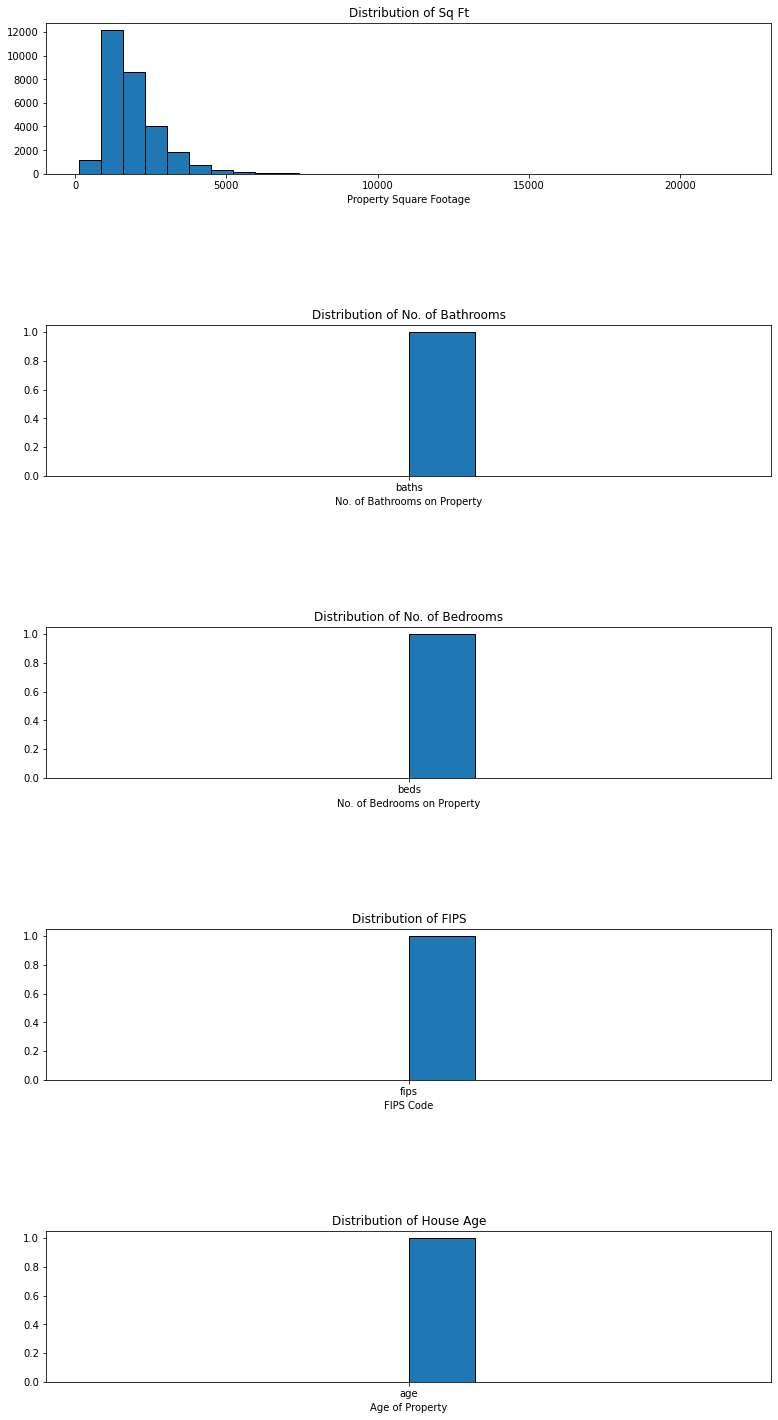

In [13]:
#checking distributions of our selected features/univariate exploration
plt.figure(figsize=(13,25))
plt.subplot(5,1,1, xlabel = 'Property Square Footage', title='Distribution of Sq Ft')
plt.hist(data=train, x='sqft', bins = 30,ec='black')

plt.subplot(5,1,2, xlabel = 'No. of Bathrooms on Property',title='Distribution of No. of Bathrooms')
plt.hist(data=train, x='baths', ec='black')

plt.subplot(5,1,3, xlabel = 'No. of Bedrooms on Property', title='Distribution of No. of Bedrooms')
plt.hist(data=train, x='beds',ec='black')

plt.subplot(5,1,4, xlabel = 'FIPS Code',title='Distribution of FIPS')
plt.hist(data=train, x='fips',ec='black')

plt.subplot(5,1,5, xlabel = 'Age of Property',title='Distribution of House Age')
plt.hist(data=train, x='age',ec='black')

plt.subplots_adjust(hspace=1)
plt.show()

In [14]:
# I creating a new df so it has target and scaled features
train_scaled = pd.concat([X_train_scaled, pd.DataFrame({'tax_value': y_train}) ], axis= 1 )

In [15]:
train_scaled.head()

,number_bedroom,number_bathroom,sqft,yearbuilt,geographic_code,tax_value
14811,0.166667,0.090909,0.037338,0.398438,0.0,231968.0
3800,0.250000,0.090909,0.041374,0.492188,0.0,318310.0
39649,0.416667,0.454545,0.166277,0.945312,0.0,2944385.0
30232,0.333333,0.454545,0.190909,0.921875,0.0,1809700.0
2287,0.250000,0.181818,0.055227,0.468750,0.0,283239.0


<AxesSubplot:title={'center':'Feautures Correlating with Value'}>

<Figure size 720x720 with 0 Axes>

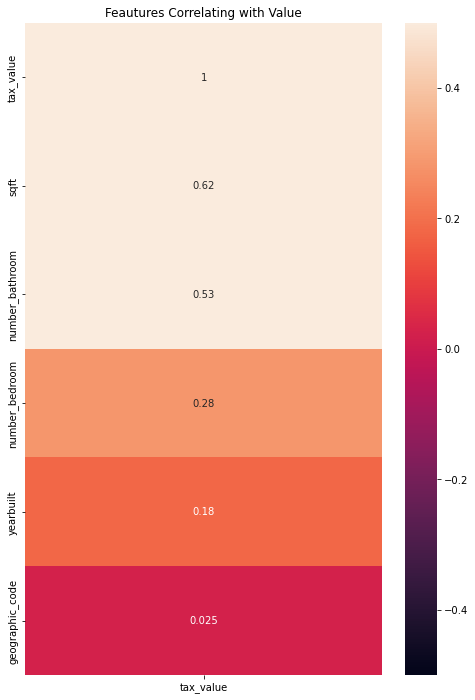

In [16]:
#let see the correlation
plt.figure(figsize=(10,10))
explore.get_zillow_heatmap(train_scaled)

<Figure size 1296x1152 with 0 Axes>

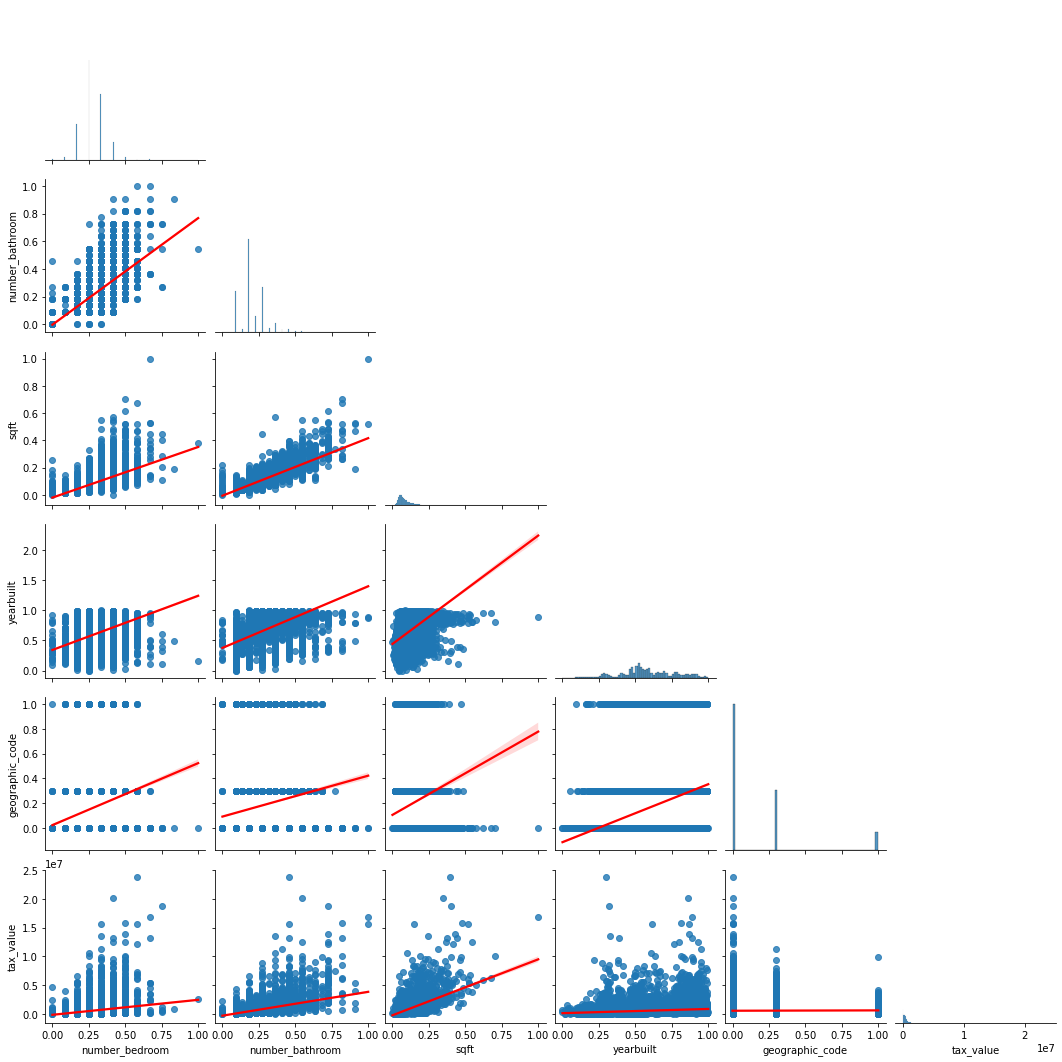

In [17]:
#as all my columns are continuous I use pairplot.
plt.figure(figsize=(18,16))
sns.pairplot(train_scaled, kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

Are bathrooms and bedrooms linearly correlated?

- 𝐻𝑜 : There is not a linear correlation between number of bathrooms and number of bedrooms for a property.
- 𝐻𝑎 : There is a linear correlation between number of bathrooms and number of bedrooms for a property.

In [18]:
# Set Significance Level
α = 0.05

In [19]:
r, p = stats.pearsonr(train_scaled.number_bedroom, train_scaled.number_bathroom)
r, p

(0.6492744489342969, 0.0)

In [20]:
if (p < α):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Text(-3, 8, 'Pearson r:0.6493\n p-stat: 0.00')

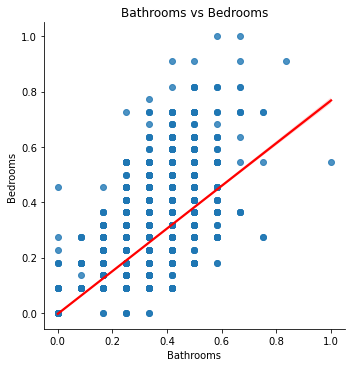

In [21]:
sns.lmplot(x = 'number_bedroom', y= 'number_bathroom', data = train_scaled, line_kws={'color': 'red'})
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.title('Bathrooms vs Bedrooms')
plt.annotate(f'Pearson r:{r:.4f}\n p-stat: {p:.2f}', xy =(-3, 8))

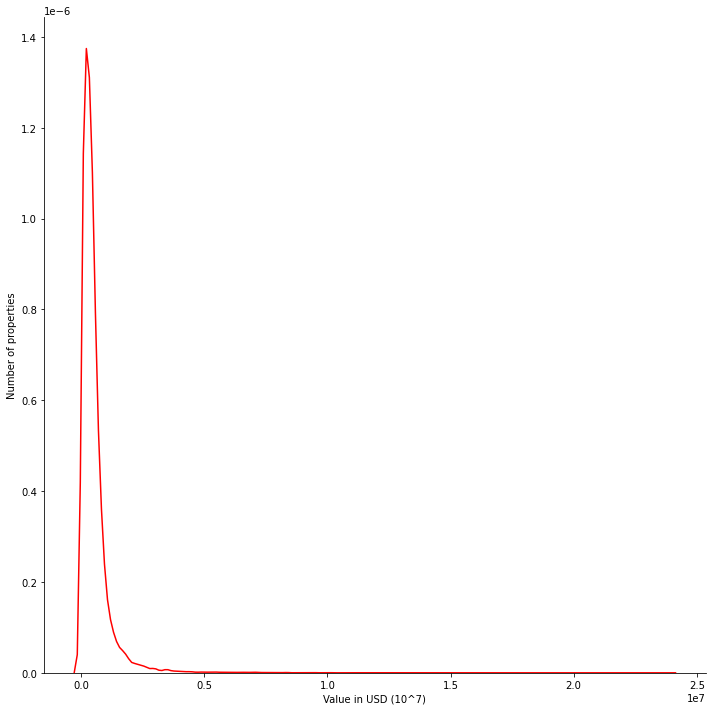

In [22]:
#plot our target
sns.displot(y_train,  kind="kde", height =10 , color = 'red')
plt.xlabel("Value in USD (10^7)")
plt.ylabel("Number of properties")
plt.show()

Baseline

I wil check mean and median to calculate my baseline and I will select the one that has better rmse

In [32]:
#using RFE to test for features to use. I set a range from 1-7 to see if it would use some or all of the features I pulled.
#It ends up telling us we should use four of the features to have the best model score.
number_of_features_list=np.arange(1,7)
high_score=0

#Variable to store the optimum features
number_of_features=0           
score_list =[]

for n in range(len(number_of_features_list)):
    model = LinearRegression()
    rfe = RFE(model,number_of_features_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_test_rfe = rfe.transform(X_test_scaled)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        number_of_features = number_of_features_list[n]

print("Optimum number of features: %d" %number_of_features)
print("Score with %d features: %f" % (number_of_features, high_score))

Optimum number of features: 5
Score with 5 features: 0.356229


In [29]:
#let's find out which four it wants us to use
#Sqft, baths, beds, and age.
cols = list(X_train_scaled.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 4)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_scaled,y_train)  

#Fitting the data to model
model.fit(X_rfe,y_train)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['number_bedroom', 'number_bathroom', 'sqft', 'yearbuilt'], dtype='object')


In [33]:
#We should really not use tax_value in our model.
#Be sure and remove the fields that leak information about taxvaluedollarcnt. 
#These are fields we would not know until we knew the assessed value, so using them would be "cheating". 
#These fields are landtaxvaluedollarcnt, structuretaxvaluedollarcnt, and taxamount.
selected_features = ['sqft', 'number_bedroom', 'number_bathroom','yearbuilt']

In [35]:
#turning my y_train and y_validate to dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#tax_value mean
tax_value_pred_mean = y_train['tax_value'].mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

#tax_value_median
tax_value_pred_median = y_train['tax_value'].median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

#RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

print('             BASELINE')
print('----------------------------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
print('----------------------------------')

#RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
print('----------------------------------')
r2_baseline = r2_score(y_validate.tax_value, y_validate.tax_value_pred_mean)
print(f'The r^2 score for baseline is {r2_baseline}')

             BASELINE
----------------------------------
RMSE using Mean
Train/In-Sample:  725542.6 
Validate/Out-of-Sample:  698603.15
----------------------------------
RMSE using Median
Train/In-Sample:  742313.77 
Validate/Out-of-Sample:  716038.36
----------------------------------
The r^2 score for baseline is -4.578674417388129e-08


In [ ]:
#Our first model: LinearRegression
#create model object
lm = LinearRegression(normalize=True)

#fit the model to our training data, specify column since it is a dataframe
lm.fit(X_train_scaled[selected_features],y_train.tax_value)

#predict train
y_train['tax_value_pred_lm'] = lm.predict(X_train_scaled[selected_features])

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)

#predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate_scaled[selected_features])

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression:\nTraining/In-Sample: ",rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)
r2_score_lm = r2_score(y_validate.tax_value, y_validate.tax_value_pred_lm)
print(f'The r^2 value for linear regression is {round(r2_score_lm,3)}')

In [ ]:
#LassoLars 
#create model object
lars = LassoLars(alpha=1.0)

#fit the model to our training data, specify column since it is a dataframe
lars.fit(X_train_scaled[selected_features],y_train.tax_value)

#predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train_scaled[selected_features])

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

#predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate_scaled[selected_features])

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for OLS using Lasso+Lars\nTraining/In-Sample: ",rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)
r2_score_lars = r2_score(y_validate.tax_value, y_validate.tax_value_pred_lars)
print(f'The r^2 value for LassoLars regression is {round(r2_score_lars,3)}')

In [ ]:
#TweedieRegressor, I found using 0 power and 0 for alpha yielded the best results...
#create model object
glm = TweedieRegressor(power =0, alpha=0.00)

#fit the model to our training data, specify column since it is a dataframe
glm.fit(X_train_scaled[selected_features],y_train.tax_value)

#predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train_scaled[selected_features])

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)

#predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate_scaled[selected_features])

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)

print("RMSE for OLS using TweedieRegressor\nTraining/In-Sample: ",rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)
r2_score_glm = r2_score(y_validate.tax_value, y_validate.tax_value_pred_glm)
print(f'The r^2 value for TweedieRegressor is {round(r2_score_glm,3)}')

In [ ]:
#making polynomial features to get a new set of features, I found that degree=3 yielded the best results.
pf = PolynomialFeatures(degree=3)

#fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train_scaled[selected_features])

#transform X_validate_scaled, and X_test_scaled
X_validate_degree3 = pf.transform(X_validate_scaled[selected_features])
X_test_degree3 = pf.transform(X_test_scaled[selected_features])

#okay let's do linear regression again with our new degree
lm3 = LinearRegression(normalize=True)

#fit the model using scaled X_train, once again specify y_train column
lm3.fit(X_train_degree3, y_train.tax_value)

#predict train
y_train['tax_value_pred_lm3'] = lm3.predict(X_train_degree3)

#evaluate rmse for train
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm3)**(1/2)

#predict validate
y_validate['tax_value_pred_lm3'] = lm3.predict(X_validate_degree3)

#evaluate rmse for validate
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm3)**(1/2)

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)
r2_score_lm3 = round(r2_score(y_validate.tax_value, y_validate.tax_value_pred_lm3),2)
print(f'The r^2 value for TweedieRegressor is {round(r2_score_lm3,3)}')

In [ ]:
plt.figure(figsize=(20,8))
plt.axhline(label="No Error", color="black")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm-y_validate.tax_value, 
            alpha=1, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lars-y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model: LassoLars Regression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm-y_validate.tax_value, 
            alpha=1, color="orange", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm3-y_validate.tax_value, 
            alpha=.5, color="dodgerblue", s=100, edgecolors='black', label="Model 3rd degree Polynomial")
plt.legend()

plt.xlabel("Actual Tax Value of Property", fontdict={'fontsize':15})
plt.ylabel("Predicted Tax Value of Property Minus Actual", fontdict={'fontsize':15})
plt.title("Residuals", fontdict={'fontsize': 20})

In [ ]:
#looks like 3rd degree polynomial did the best, let's visualize that
plt.figure(figsize=(20,8))

sns.regplot(data=y_test, x=y_validate.tax_value, y=y_validate.tax_value_pred_lm3, 
            scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel("Actual Tax Value of Property", fontdict={'fontsize':15})
plt.ylabel("Predicted Tax Value of Property W/ Polynomial Regression Model", fontdict={'fontsize':15})
plt.title("Polynomial Regression Model", fontdict={'fontsize': 20})

plt.show()

In [ ]:
#turning it into a dataframe
y_test = pd.DataFrame(y_test)

# predicting on our test model
y_test['tax_value_pred_lm3'] = lm3.predict(X_test_degree3)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm3)**(1/2)
print('             ')
print('             Our Test Model')
print('----------------------------------')
print('----------------------------------')
print("RMSE for OLS Model using Polynomial (3 degrees)\nOut-of-Sample Performance: ", rmse_test)
r2_test_score_lm3 = r2_score(y_test.tax_value, y_test.tax_value_pred_lm3)
print("RSME for baseline: ", rmse_validate)
print(f'Polynomial Regression (3 degrees) has an R^2 value of {round(r2_test_score_lm3,3)}')

Our test model (Polynomial regression, 3 degrees) performs better than the baseline. It has a lower RMSE, lower variance between test/validate, and has a higher r^2 value, so it can better explain the variances between predicted and actual home values.